<a href="https://colab.research.google.com/github/Nikita1013/Machine-Learning-with-Python/blob/master/Hyperparameter_Tuning_%3EGridSearchCV_and_RandomizedSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

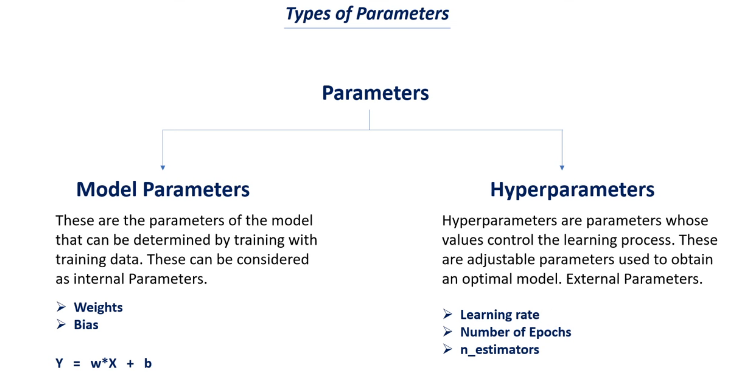

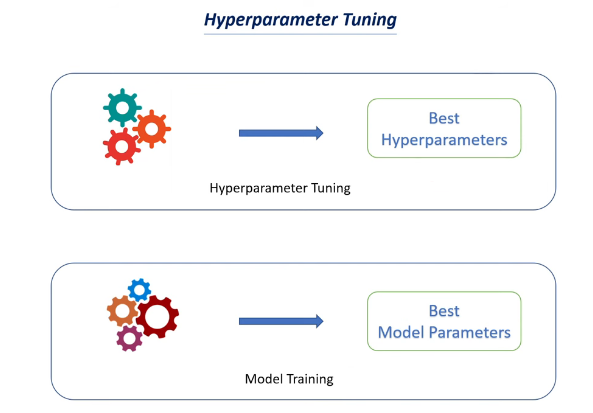

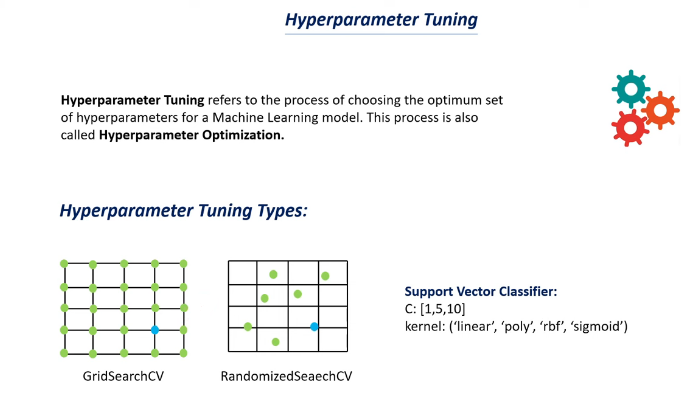

**Hyper Parameter Tuning**
1. GridSearchCV
2. RandomizedSearchCV

In [2]:
#importing the dependencies
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [5]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [7]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [9]:
# loading the data to a dataframe
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [11]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# print the last 5 rows of the dataframe
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [13]:
# adding the target column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [14]:
# print the first 5 rows  of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
# number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [16]:
# missing values
data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [17]:
# checking the distribution of the target variable
data_frame['label'].value_counts()

,count
label,
1,357
0,212


0 --> Benign

1 --> Malignant

Separating the features and target

In [18]:
X = data_frame.drop(columns='label',axis=1)
Y = data_frame['label']

In [19]:
print(X)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


In [20]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [21]:
X = np.asarray(X)
Y = np.asarray(Y)

#**GridSearchCV**

GridSearchCV is used for determining the best parameters for our model

In [22]:
# loading the SVC (Support Vector Classifier) model
model = SVC()

In [23]:
# hyperparameters

parameters = {
    'kernel':['linear','poly','rbf','sigmoid'],
    'C':[1, 5, 10, 20]
}

In [24]:
# Grid Search
classifier = GridSearchCV(model, parameters, cv=5)  # cv -> Cross Validation

In [25]:
# fitting the data to our model
classifier.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [26]:
classifier.cv_results_

{'mean_fit_time': array([1.39346185e+00, 3.66954803e-03, 4.47268486e-03, 2.02931404e-02,
        3.26633053e+00, 3.93261909e-03, 4.07223701e-03, 1.34878635e-02,
        4.58415737e+00, 6.54826164e-03, 6.04605675e-03, 2.07696915e-02,
        7.44323597e+00, 7.07674026e-03, 6.25243187e-03, 2.21249580e-02]),
 'std_fit_time': array([5.26231494e-01, 9.27312076e-05, 1.26547264e-04, 6.54999021e-03,
        8.55667259e-01, 3.00357057e-04, 1.92764003e-04, 4.97882147e-04,
        8.26695486e-01, 9.07707001e-04, 6.50639017e-05, 1.59372919e-03,
        2.34281414e+00, 2.66651287e-04, 2.33050209e-04, 2.11113717e-03]),
 'mean_score_time': array([0.00131574, 0.00129652, 0.00187297, 0.00600576, 0.00132098,
        0.00129385, 0.00172443, 0.00360756, 0.00136027, 0.00195165,
        0.00256314, 0.00583329, 0.00128775, 0.00250788, 0.00260797,
        0.00626011]),
 'std_score_time': array([1.09442760e-04, 2.77091217e-05, 6.61753777e-05, 1.78932647e-03,
        1.53368177e-04, 3.63534470e-05, 5.15721817e-

In [30]:
# printing the best parameters for our SVC

best_parameters = classifier.best_params_
print(best_parameters)

{'C': 10, 'kernel': 'linear'}


In [32]:
# determinig the highest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9525694767893185


In [33]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)

In [34]:
# printing the first 5 rows
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.393462,0.526231,0.001316,0.000109,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.003670,0.000093,0.001297,0.000028,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.004473,0.000127,0.001873,0.000066,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.020293,0.006550,0.006006,0.001789,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,3.266331,0.855667,0.001321,0.000153,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [36]:
grid_search_result = result[['param_C', 'param_kernel', 'mean_test_score']]

In [37]:
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,1,poly,0.908663
2,1,rbf,0.912172
3,1,sigmoid,0.460441
4,5,linear,0.950815
5,5,poly,0.922729
6,5,rbf,0.931501
7,5,sigmoid,0.411178
8,10,linear,0.952569
9,10,poly,0.920975


Highest Accuracy  = 95.2%

Best Parameters = {'C':10, 'kernel':'linear'}

#**Randomized Search CV**

In [38]:
model = SVC()

In [39]:
# hyperparameters


parameters = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'C':[1, 5, 10, 20]
}

In [40]:
# randomized search
classifier = RandomizedSearchCV(model, parameters, cv=5)

In [42]:
#fitting the data to our model
classifier.fit(X,Y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [43]:
classifier.cv_results_

{'mean_fit_time': array([3.51881504e-02, 7.06152916e-03, 3.05368457e+00, 6.20126724e-03,
        5.39166598e+00, 1.34471416e-02, 3.65710258e-03, 1.36540890e-02,
        2.08871212e+00, 6.62426949e-03]),
 'std_fit_time': array([1.19609233e-02, 5.18200232e-04, 8.29634573e-01, 1.19469028e-03,
        2.27327646e+00, 6.78518343e-04, 1.15868780e-04, 5.19747047e-04,
        7.16821136e-01, 3.28562235e-04]),
 'mean_score_time': array([0.00750103, 0.00284109, 0.00120554, 0.00265985, 0.00129719,
        0.00354824, 0.00129089, 0.00356379, 0.00163054, 0.00294971]),
 'std_score_time': array([1.72930823e-03, 1.21871835e-04, 2.22098648e-05, 6.14583210e-04,
        2.00217524e-04, 1.06201238e-04, 4.36155106e-05, 3.80137023e-05,
        3.48649100e-04, 1.51519987e-04]),
 'param_kernel': masked_array(data=['sigmoid', 'rbf', 'linear', 'rbf', 'linear', 'sigmoid',
                    'poly', 'sigmoid', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False, False, False,
         

In [45]:
# best parameters

best_parameters = classifier.best_params_
print(best_parameters)

{'kernel': 'linear', 'C': 10}


In [46]:
# highest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9525694767893185


In [47]:
#loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)

In [48]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035188,0.011961,0.007501,0.001729,sigmoid,1,"{'kernel': 'sigmoid', 'C': 1}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,8
1,0.007062,0.000518,0.002841,0.000122,rbf,10,"{'kernel': 'rbf', 'C': 10}",0.877193,0.921053,0.912281,0.956140,0.946903,0.922714,0.027879,5
2,3.053685,0.829635,0.001206,0.000022,linear,5,"{'kernel': 'linear', 'C': 5}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2
3,0.006201,0.001195,0.002660,0.000615,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,6
4,5.391666,2.273276,0.001297,0.000200,linear,10,"{'kernel': 'linear', 'C': 10}",0.938596,0.938596,0.973684,0.947368,0.964602,0.952569,0.014200,1


In [49]:
randomized_search_result = result[['param_C','param_kernel', 'mean_test_score']]

In [50]:
randomized_search_result

,param_C,param_kernel,mean_test_score
0,1,sigmoid,0.460441
1,10,rbf,0.922714
2,5,linear,0.950815
3,1,rbf,0.912172
4,10,linear,0.952569
5,10,sigmoid,0.402391
6,1,poly,0.908663
7,5,sigmoid,0.411178
8,1,linear,0.945536
9,5,rbf,0.931501


Highest Accuracy = 95.2%

Best parameters  = {'C':10,'kernel':'linear'}